In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
game_df = pd.read_csv('game_1.csv')
game_df.sample()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
44316,22006,1610612755,PHI,Philadelphia 76ers,20600615,2007-01-23 00:00:00,PHI vs. NOK,W,240,38.0,...,42.0,14.0,9.0,5.0,15.0,20.0,96.0,-6,0,Regular Season


In [6]:
game_df['season_id'].value_counts()[(game_df['season_id'].value_counts()==1230)|(game_df['season_id'].value_counts()==1189)]


season_id
22016    1230
22004    1230
22018    1230
22008    1230
22015    1230
22021    1230
22013    1230
22014    1230
22022    1230
22005    1230
22006    1230
22010    1230
22007    1230
22009    1230
22017    1230
22003    1189
21996    1189
22002    1189
22001    1189
22000    1189
21999    1189
21997    1189
21995    1189
Name: count, dtype: int64

In [7]:
game_df[['team_id_home','team_abbreviation_home']].value_counts().sort_values(ascending=False)

team_id_home  team_abbreviation_home
1610612738    BOS                       3124
1610612752    NYK                       2927
1610612747    LAL                       2661
1610612765    DET                       2545
1610612741    CHI                       2313
                                        ... 
12307         ROM                          1
12306         KHI                          1
94            EAM                          1
12305         LYV                          1
45            CHN                          1
Name: count, Length: 98, dtype: int64

In [8]:
game_df.sample(5)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
40270,22003,1610612742,DAL,Dallas Mavericks,20300499,2004-01-07 00:00:00,DAL vs. GSW,W,240,41.0,...,45.0,27.0,8.0,5.0,15.0,20.0,99.0,-6,0,Regular Season
2492,21952,1610612737,MIH,Milwaukee Hawks,25200221,1953-01-29 00:00:00,MIH vs. BAL,W,0,23.0,...,NaN,NaN,NaN,NaN,NaN,27.0,67.0,-3,0,Regular Season
2925,21953,1610612755,SYR,Syracuse Nationals,25300272,1954-02-25 00:00:00,SYR vs. BOS,L,0,32.0,...,NaN,NaN,NaN,NaN,NaN,29.0,101.0,5,0,Regular Season
27207,21992,1610612748,MIA,Miami Heat,29200337,1992-12-28 00:00:00,MIA vs. LAL,W,240,41.0,...,33.0,22.0,8.0,3.0,17.0,28.0,96.0,-11,0,Regular Season
59257,22018,1610612759,SAS,San Antonio Spurs,21800010,2018-10-17 00:00:00,SAS vs. MIN,W,240,40.0,...,46.0,20.0,9.0,2.0,11.0,27.0,108.0,-4,1,Regular Season


In [9]:
game_df[['fgm_home','fga_home','fg_pct_home','fg3m_home','fg3_pct_home','ftm_home',]]

,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3_pct_home,ftm_home
0,25.0,NaN,NaN,NaN,NaN,16.0
1,20.0,59.0,0.339,NaN,NaN,16.0
2,21.0,NaN,NaN,NaN,NaN,17.0
3,21.0,NaN,NaN,NaN,NaN,21.0
4,10.0,NaN,NaN,NaN,NaN,13.0
...,...,...,...,...,...,...
65693,34.0,92.0,0.370,11.0,0.314,15.0
65694,35.0,78.0,0.449,8.0,0.320,17.0
65695,38.0,84.0,0.452,5.0,0.179,13.0
65696,79.0,132.0,0.598,17.0,0.283,0.0


In [10]:
game_df['season_type'].value_counts()

season_type
Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star             65
All-Star             63
Name: count, dtype: int64

# DESCRIPCIÓN DE LAS COLUMNAS DEL CSV GAME.

## STATS GENERALES
* **season_id** : hay una cifra(2,3,etc) y seguido el año de inicio de la temporada.
* **team_id_home**, un id para idenatificar a los equipos. 
* **team_abbreviation_home**, abreviatura del nombre del equipo
* **team_name_home**, nombre del equipo
* **game_id**, identificador del partido al que referencian las estadisiticas de esta fila
* **game_date**, fecha de dicho partido
* **matchup_home**, muestra quienes son los equipos que juegan con sus abrreviaturas y vs en el medio
* **wl_home**,  -----no he encontrado nada------
* **min**, minutos jugados

## STATS POR EQUIPO
## EQUIPO LOCAL
### TIROS DE CAMPO
* **fgm_home**, field goals made por el equipo local. canastas de 2 ptos HECHAS!
* **fga_home**, field goals attempted por el equipo local. canastas de 2 ptos INTENTADAS!
* **fg_pct_home**,   field goals percentage
* 
### TIROS DE 3 PUNTOS
* **fg3m_home**, tiros de 3 convertidos
* **fg3a_home**, tiros de 3 intentados
* **fg3_pct_home**, porcentaje de acierto en tiros de 3
* 
* ### TIROS LIBRES
* **ftm_home**, tiros libres convertidos
* **fta_home**,tiros libres intentados
* **ft_pct_home**, porcentaje de acierto en tiros libres

## REBOTES / ASISTENCIAS / ROBOS / TAPONES / PERDIDAS / FALTAS / PUNTOS
* **oreb_home**, rebotes ofensivos
* **dreb_home**,rebotes defensivos
* **reb_home**,rebotes totales
* **ast_home**,asistencias
* **stl_home**,robos
* **blk_home**,tapones
* **tov_home**, pérdidas de balón
* **pf_home**, faltas
* **pts_home**, puntos
* **plus_minus_home**, valoración
* **video_available_home**, video disponible.

## EQUIPO VISITANTE
## STATS GENERALES
* **team_id_away**, un id para idenatificar a los equipos.
* **team_abbreviation_away**,abreviatura del nombre del equipo
* **team_name_away**, nombre del equipo
* **matchup_away**,muestra quienes son los equipos que juegan con sus abrreviaturas y vs en el medio
* **wl_away**, -----no he encontrado nada------

### TIROS DE CAMPO
* **fgm_away**, field goals made por el equipo local. canastas de 2 ptos HECHAS!
* **fga_away**, field goals attempted por el equipo local. canastas de 2 ptos INTENTADAS!
* **fg_pct_away**,   field goals percentage

### TIROS DE 3 PUNTOS 
* **fg3m_away**, tiros de 3 convertidos
* **fg3a_away**, tiros de 3 intentados
* **fg3_pct_away**, porcentaje de acierto en tiros de 3

### TIROS LIBRES
* **ftm_away**, tiros libres convertidos
* **fta_away**, tiros libres intentados
* **ft_pct_away**, porcentaje de acierto en tiros libres

## REBOTES / ASISTENCIAS / ROBOS / TAPONES / PERDIDAS / FALTAS / PUNTOS
* **oreb_away**, rebotes ofencsivos
* **dreb_away**, rebotes defensivos
* **reb_away**, rebotes totales
* **ast_away**, asistencias
* **stl_away**, robos
* **blk_away**, tapones
* **tov_away**, pérdidas de balón
* **pf_away**, faltas
* **pts_away**, puntos
* **plus_minus_away**, valoración
* **video_available_away**, video disponible

## INDICADOR DE TIPO DE PARTIDO (PLAYOFF, TEMPORADA REGULAR, ALL STAR)
* **season_type** , indicador del tipo de partido. 3 opciones , 'Regular Season', 'Playoffs', 'All Star'


In [11]:
#HAY ALGUNAS COLUMNAS QUE DIRECTAMENTE PUEDO ELIMINAR. pOSTERIORMENTE SEGURAMENTE ELIMINE ALGUNA MÁS.

game_df.drop(columns=['team_id_home','team_id_away','wl_home','wl_away','video_available_home','video_available_away'],inplace=True)


# PRIMERA APROXIMACIÓN AL DF

In [12]:
game_df.describe().round(2)

,season_id,game_id,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,...,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away
count,65698.00,65698.00,65698.0,65685.00,50251.00,50208.00,52480.00,47015.00,46624.00,65682.00,...,46762.00,46700.00,49973.00,49897.00,46849.00,47073.00,47013.0,62847.00,65698.00,65698.00
mean,22949.34,25847473.13,221.0,39.67,83.99,0.47,5.74,17.74,0.35,20.69,...,11.69,30.24,42.12,22.14,7.85,4.68,15.2,23.10,100.99,-3.63
std,5000.31,6303760.43,67.9,6.77,9.16,0.06,4.54,10.55,0.15,7.14,...,4.28,5.59,6.87,5.38,3.03,2.50,4.3,5.23,14.42,13.09
min,12005.00,10500001.00,0.0,4.00,0.00,0.14,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,19.00,-73.00
25%,21981.00,21300533.25,240.0,35.00,78.00,0.43,2.00,10.00,0.26,16.00,...,9.00,26.00,37.00,18.00,6.00,3.00,12.0,20.00,92.00,-12.00
50%,21997.00,26300068.50,240.0,40.00,84.00,0.47,5.00,16.00,0.35,20.00,...,11.00,30.00,42.00,22.00,8.00,4.00,15.0,23.00,101.00,-4.00
75%,22011.00,28800693.75,240.0,44.00,89.00,0.51,9.00,24.00,0.43,25.00,...,14.00,34.00,47.00,26.00,10.00,6.00,18.0,26.00,110.00,5.00
max,42022.00,49800087.00,365.0,84.00,240.00,0.70,28.00,77.00,1.00,61.00,...,40.00,60.00,90.00,89.00,27.00,19.00,40.0,115.00,196.00,68.00


In [13]:
game_df.dtypes
#veo que son casi todos float o int. Cool




season_id                   int64
team_abbreviation_home     object
team_name_home             object
game_id                     int64
game_date                  object
matchup_home               object
min                         int64
fgm_home                  float64
fga_home                  float64
fg_pct_home               float64
fg3m_home                 float64
fg3a_home                 float64
fg3_pct_home              float64
ftm_home                  float64
fta_home                  float64
ft_pct_home               float64
oreb_home                 float64
dreb_home                 float64
reb_home                  float64
ast_home                  float64
stl_home                  float64
blk_home                  float64
tov_home                  float64
pf_home                   float64
pts_home                  float64
plus_minus_home             int64
team_abbreviation_away     object
team_name_away             object
matchup_away               object
fgm_away      

# VALORES FALTANTES

In [14]:
# A BUSCAR VALORES FALTANTES
# INTUYO QUE LOS PRIMEROS PARTIDOS QUE HAYA TENDRÁN MUCHOS NAN. PORQUE ERA 1946 Y CREQO QUE NO SE REGISTRABAN ALGUNAS COSAS.

na_values = game_df.isna().sum()
na_values
# efectivamente hay bastante data faltante, entorno a un 27% en algunos sitios.
# voy a localizar donde está el NAN y ver que valores hay.

season_id                     0
team_abbreviation_home        0
team_name_home                0
game_id                       0
game_date                     0
matchup_home                  0
min                           0
fgm_home                     13
fga_home                  15447
fg_pct_home               15490
fg3m_home                 13218
fg3a_home                 18683
fg3_pct_home              19074
ftm_home                     16
fta_home                   3004
ft_pct_home                3009
oreb_home                 18936
dreb_home                 18999
reb_home                  15729
ast_home                  15805
stl_home                  18849
blk_home                  18626
tov_home                  18684
pf_home                    2856
pts_home                      0
plus_minus_home               0
team_abbreviation_away        0
team_name_away                0
matchup_away                  0
fgm_away                     13
fga_away                  15447
fg_pct_a

In [15]:
#voy a ir columna a columna.
game_df[['game_date','fgm_home','fgm_away','ftm_home','ftm_away']][(game_df['fgm_home'].isna())|(game_df['fgm_away'].isna())|(game_df['ftm_home'].isna())|(game_df['ftm_away'].isna())]

#EFECTIVAMENTE LOS NAN DE ESTAS PRIMERAS COLUMNAS QUE ESTOY COMPROBANDO SE ENCUENTRA EN APROX. LA PRIMERA DECADA. 
#EN REALIDAD NO ME VAN A SERVIR DATOS TAN ANTIGUOS PARA COMRPOBAR LAS HIPÓTESIS ASI QUE PUEDO ELIMINAR ESTAS FILAS SIN PROBLEMA.
game_df= game_df.drop(game_df[['game_date','fgm_home','fgm_away','ftm_home','ftm_away']][(game_df['fgm_home'].isna())|(game_df['fgm_away'].isna())|(game_df['ftm_home'].isna())|(game_df['ftm_away'].isna())].index,axis=0)

In [16]:
# VOY A PONER EL FILTRO DE LOS NAN EN TODAS LAS ESTADISTICAS RELATIVAS AL TIRO A LA VEZ PARA TODAS ELLAS
# PORQUE CREO QUE VAN A SER LAS MISMAS FILAS. LO VEREMOS. COMO MÍNIMO DEBERIAN SALIR 19074 FILAS. PORQUE VOY A PONER TODO OR
nan_tiros_df = game_df[(game_df['fga_home'].isna())|(game_df['fga_away'].isna())|(game_df['fg_pct_home'].isna())|(game_df['fg3m_home'].isna()) \
   |(game_df['fg3_pct_home'].isna())|(game_df['fta_home'].isna())|(game_df['ft_pct_home'].isna())|(game_df['fg_pct_away'].isna())|(game_df['fg3m_away'].isna())|(game_df['fg3_pct_away'].isna())|(game_df['fta_away'].isna())|(game_df['ft_pct_away'].isna())]    
nan_tiros_df
# HAN SALIDO 19307 FILAS, ALGUNA MÁS QUE LAS QUE ESPERABA. lAS TENDRÉ QUE BUSCAR.

,season_id,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
0,21946,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,0,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,Regular Season
1,21946,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,0,20.0,59.0,0.339,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,Regular Season
2,21946,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,Regular Season
3,21946,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,Regular Season
4,21946,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28674,21993,PHX,Phoenix Suns,29300622,1994-02-09 00:00:00,PHX vs. MIN,240,41.0,81.0,0.506,...,26.0,43.0,22.0,8.0,3.0,16.0,28.0,106.0,-5,Regular Season
33642,21997,PHI,Philadelphia 76ers,29700844,1998-03-04 00:00:00,PHI vs. MIL,240,34.0,80.0,0.425,...,32.0,46.0,15.0,8.0,8.0,21.0,27.0,80.0,-7,Regular Season
44984,12006,CLE,Cleveland Cavaliers,10600050,2006-10-17 00:00:00,CLE vs. MTA,240,37.0,71.0,0.521,...,0.0,0.0,18.0,0.0,7.0,3.0,0.0,67.0,-26,Pre Season
65696,32022,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,221,79.0,132.0,0.598,...,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,All-Star


In [17]:
nan_tiros_df[nan_tiros_df['game_date'].str.startswith('19')]
# HAY 3 PARTIDOS CON VALORES FALTANTES DEL 2000 Y PICO.QUE SON LOS QUE ME VAN A SERVIR PARA COMPROBAR LAS HIPÓTESIS.
#ASÍ QUE VOY A BUSCAR ESOS DATOS EN INTERNET Y LOS RELLENO A MANO (QUE SON POCOS)

,season_id,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
0,21946,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,0,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,Regular Season
1,21946,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,0,20.0,59.0,0.339,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,Regular Season
2,21946,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,Regular Season
3,21946,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,Regular Season
4,21946,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28145,21993,IND,Indiana Pacers,29300093,1993-11-18 00:00:00,IND vs. HOU,240,37.0,94.0,0.394,...,37.0,50.0,20.0,11.0,8.0,21.0,20.0,99.0,16,Regular Season
28167,21993,IND,Indiana Pacers,29300107,1993-11-20 00:00:00,IND vs. BOS,240,39.0,84.0,0.464,...,24.0,35.0,24.0,7.0,6.0,11.0,27.0,94.0,-6,Regular Season
28490,21993,DAL,Dallas Mavericks,29300435,1994-01-12 00:00:00,DAL vs. MIN,240,36.0,89.0,0.404,...,31.0,37.0,23.0,9.0,7.0,18.0,22.0,103.0,18,Regular Season
28674,21993,PHX,Phoenix Suns,29300622,1994-02-09 00:00:00,PHX vs. MIN,240,41.0,81.0,0.506,...,26.0,43.0,22.0,8.0,3.0,16.0,28.0,106.0,-5,Regular Season


In [18]:
fechas_2000_nan = list(nan_tiros_df['game_date'][nan_tiros_df['game_date'].str.startswith('2')])
fechas_2000_nan

['2006-10-17 00:00:00', '2023-02-19 00:00:00', '2023-02-19 00:00:00']

In [19]:
nan_tiros_df[nan_tiros_df['game_date']==fechas_2000_nan[0]]

,season_id,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
44984,12006,CLE,Cleveland Cavaliers,10600050,2006-10-17 00:00:00,CLE vs. MTA,240,37.0,71.0,0.521,...,0.0,0.0,18.0,0.0,7.0,3.0,0.0,67.0,-26,Pre Season


In [20]:
nan_tiros_df[nan_tiros_df['game_date']==fechas_2000_nan[1]]

,season_id,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
65696,32022,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,221,79.0,132.0,0.598,...,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,All-Star
65697,32022,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,221,79.0,132.0,0.598,...,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,All Star


In [21]:
nan_tiros_df[nan_tiros_df['game_date']==fechas_2000_nan[2]]

,season_id,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
65696,32022,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,221,79.0,132.0,0.598,...,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,All-Star
65697,32022,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,221,79.0,132.0,0.598,...,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,All Star


De las 3 fechas que tienen valores faltantes con fechas superior al año 2000, las dos últimas son el mismo partido que está repetido, y además es partido de all star. Así que puedo eliminarlos sin problema. El otro partido es de pretemporada así que también lo puedo quitar.

Para que no me pase más esto. Voy reducir el df a únicamente partidos de temporada regular y playoffs que son los que me interesan.


In [22]:
game_df['season_type'].unique()

array(['Regular Season', 'Playoffs', 'All-Star', 'All Star', 'Pre Season'],
      dtype=object)

In [23]:
#compruebo cuantas filas tengo antes de reducir el df
game_df.shape

(65681, 49)

In [24]:
game_df = game_df[(game_df['season_type']=='Playoffs')|(game_df['season_type']=='Regular Season')]
game_df.shape

(64017, 49)

Lo siguiente que voy a hacer es quedarme únicamente con los partidos de los 2000 en adelante.
Considero que es más que suficiente para hacer el análisis.

In [25]:
df_XX = game_df[game_df['game_date'].str.startswith('2')]

Para no perderlo, también guardo en otro df los partidos de antes del año 2000 por si los necesito más adelante

In [26]:
df_XIX = game_df[game_df['game_date'].str.startswith('19')]

In [27]:
print(f'Tamaño del df de partidos posteriores al año 2000 : {df_XX.shape}')
print(f'Tamaño del df de partidos anteriores al año 2000 : {df_XIX.shape}')


Tamaño del df de partidos posteriores al año 2000 : (28847, 49)
Tamaño del df de partidos anteriores al año 2000 : (35170, 49)


#PARTIDOS 2000 - XXXX

    A partir de aquí voy a trabajar únicamente con los partidos posteriores al año 2000. 

    Voy a seguir los siguientes pasos: 

        1. Eliminar los datos duplicados o irrelevantes
        2. Corregir los errores estructurales --> fecha
        3. Filtra valores atípicos no deseados --> no se esperan
        4. Maneja los datos faltantes 
        5. Valida y controla la calidad 

1. Eliminar los datos duplicados o irrelevantes

In [28]:
df_XX.duplicated().value_counts()


False    28847
Name: count, dtype: int64

* NO HAY LINEAS COMPLETAS DUPLICADAS
* ME PARECE RARO PORQUE YA HE ENCONTRADO UN DUPLICADO EN   PARTIDO DE ALL STAR. 
* VOY A COMPROBARLO POR ID DEL PARTIDO POR SI ACASO

In [29]:
df_XX['game_id'].duplicated().value_counts()
# PUES TAMPOCO. TODO BIEN

game_id
False    28847
Name: count, dtype: int64

2. Corregir los errores estructurales

Voy a revisar como están estructurados los datos en cada columna para ver si puedo mejorar algo. De primeras se me ocurre que en la columna de la fecha puedo usar el formato fecha. 

Primero le voy a quitar la hora que no da información.

In [30]:

df_XX['game_date'] = df_XX['game_date'].str[:10]
df_XX

C:\Users\iauzm\AppData\Local\Temp\ipykernel_2972\2782255556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_XX['game_date'] = df_XX['game_date'].str[:10]


,season_id,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
35272,21999,MIA,Miami Heat,29900423,2000-01-02,MIA vs. ORL,265,38.0,93.0,0.409,...,42.0,63.0,17.0,6.0,5.0,21.0,32.0,103.0,-8,Regular Season
35273,21999,ORL,Orlando Magic,29900427,2000-01-03,ORL vs. DET,240,40.0,79.0,0.506,...,28.0,48.0,30.0,13.0,5.0,14.0,27.0,118.0,12,Regular Season
35274,21999,WAS,Washington Wizards,29900426,2000-01-03,WAS vs. GSW,240,40.0,84.0,0.476,...,25.0,35.0,25.0,9.0,4.0,20.0,24.0,87.0,-12,Regular Season
35275,21999,UTA,Utah Jazz,29900429,2000-01-03,UTA vs. DEN,240,44.0,87.0,0.506,...,26.0,38.0,21.0,5.0,6.0,18.0,22.0,89.0,-20,Regular Season
35276,21999,CHI,Chicago Bulls,29900428,2000-01-03,CHI vs. POR,240,26.0,77.0,0.338,...,34.0,39.0,30.0,20.0,9.0,23.0,22.0,88.0,25,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65691,42022,DEN,Denver Nuggets,42200401,2023-06-01,DEN vs. MIA,240,40.0,79.0,0.506,...,32.0,43.0,26.0,5.0,4.0,8.0,15.0,93.0,-11,Playoffs
65692,42022,DEN,Denver Nuggets,42200402,2023-06-04,DEN vs. MIA,240,39.0,75.0,0.520,...,23.0,31.0,28.0,5.0,4.0,11.0,22.0,111.0,3,Playoffs
65693,42022,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,240,34.0,92.0,0.370,...,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,Playoffs
65694,42022,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,240,35.0,78.0,0.449,...,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,Playoffs


Segundo, voy a cambiarle el formato de la columna game_date a fecha.

In [32]:
df_XX['game_date'] = pd.to_datetime(df_XX['game_date'],format='%Y-%m-%d')
df_XX.dtypes

C:\Users\iauzm\AppData\Local\Temp\ipykernel_2972\3044573942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_XX['game_date'] = pd.to_datetime(df_XX['game_date'],format='%Y-%m-%d')


season_id                          int64
team_abbreviation_home            object
team_name_home                    object
game_id                            int64
game_date                 datetime64[ns]
matchup_home                      object
min                                int64
fgm_home                         float64
fga_home                         float64
fg_pct_home                      float64
fg3m_home                        float64
fg3a_home                        float64
fg3_pct_home                     float64
ftm_home                         float64
fta_home                         float64
ft_pct_home                      float64
oreb_home                        float64
dreb_home                        float64
reb_home                         float64
ast_home                         float64
stl_home                         float64
blk_home                         float64
tov_home                         float64
pf_home                          float64
pts_home        

3. Filtra valores atípicos no deseados 

    No debería haber valores atípicos. Voy a comprobarlo con el describe y si veo algo raro, estudio el caso concreto.

In [48]:
df_XX.describe().round(2)

,season_id,game_id,game_date,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,...,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away
count,28847.00,28847.00,28847,28847.00,28847.00,28847.00,28847.00,28847.00,28847.00,28847.00,...,28847.00,28847.00,28847.00,28847.00,28847.00,28847.00,28847.00,28847.00,28847.00,28847.00
mean,23220.48,22541231.45,2011-09-24 22:32:53.529309696,241.77,38.29,83.20,0.46,7.99,22.19,0.36,...,10.82,31.23,42.05,21.55,7.52,4.62,14.51,21.33,100.26,-2.93
min,21999.00,20000001.00,2000-01-02 00:00:00,240.00,17.00,54.00,0.25,0.00,1.00,0.00,...,0.00,12.00,20.00,4.00,0.00,0.00,2.00,7.00,53.00,-73.00
25%,22005.00,20501226.50,2005-11-19 00:00:00,240.00,34.00,78.00,0.42,5.00,15.00,0.29,...,8.00,27.00,38.00,18.00,5.00,3.00,12.00,18.00,91.00,-12.00
50%,22011.00,21300068.00,2011-02-25 00:00:00,240.00,38.00,83.00,0.46,7.00,21.00,0.36,...,11.00,31.00,42.00,21.00,7.00,4.00,14.00,21.00,100.00,-4.00
75%,22018.00,21801129.50,2017-12-05 00:00:00,240.00,42.00,88.00,0.50,11.00,29.00,0.43,...,13.00,35.00,46.00,25.00,9.00,6.00,17.00,24.00,109.00,6.00
max,42022.00,42200405.00,2023-06-12 00:00:00,340.00,63.00,125.00,0.68,28.00,70.00,1.00,...,38.00,60.00,81.00,47.00,20.00,19.00,34.00,42.00,176.00,58.00
std,4768.30,4982772.61,NaN,7.47,5.48,7.98,0.06,4.26,9.67,0.12,...,3.93,5.48,6.51,5.16,2.90,2.44,4.00,4.56,13.60,13.41


* Me llama la atención que al parecer ha habido un partido que ha durado 340 minutos.
    -Pero los cuartiles 1,2 y 3 son 240 mins así que será un único partido el que está equivocado seguramente.

* En la columna 'fg3_pct_home'  veo que alguien metió el 100% de los triples. CUrioso aunque posible.

In [50]:
# COMPRUEBO EL CASO DE 340 MIN DE PARTIDO

df_XX[df_XX['min']>330]
#ES CORRECTO. 340 min son 4 prórrogas. Y ha sucedido varias veces.

,season_id,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
51568,22011,ATL,Atlanta Hawks,21100722,2012-03-25,ATL vs. UTA,340,48.0,107.0,0.449,...,41.0,64.0,28.0,8.0,8.0,10.0,38.0,133.0,-6,Regular Season
55420,22015,CHI,Chicago Bulls,21500391,2015-12-18,CHI vs. DET,340,50.0,120.0,0.417,...,45.0,64.0,28.0,7.0,4.0,11.0,35.0,147.0,3,Regular Season
57162,22016,ATL,Atlanta Hawks,21600711,2017-01-29,ATL vs. NYK,340,52.0,119.0,0.437,...,48.0,63.0,32.0,9.0,11.0,14.0,39.0,139.0,-3,Regular Season
60185,22018,ATL,Atlanta Hawks,21800928,2019-03-01,ATL vs. CHI,340,61.0,123.0,0.496,...,51.0,62.0,30.0,10.0,5.0,17.0,30.0,168.0,7,Regular Season
60535,42018,POR,Portland Trail Blazers,41800233,2019-05-03,POR vs. DEN,340,52.0,124.0,0.419,...,42.0,66.0,28.0,11.0,8.0,21.0,27.0,137.0,-3,Playoffs


In [52]:
#compruebo los casos en que han metido el 100% de los triples.
df_XX[['matchup_home','fg3_pct_home','fg3a_home','fg3m_home']][df_XX['fg3_pct_home']==1]
#ES CORRECTO

,matchup_home,fg3_pct_home,fg3a_home,fg3m_home
36565,ATL vs. LAC,1.0,3.0,3.0
37314,MIA vs. TOR,1.0,3.0,3.0
38411,SEA vs. LAC,1.0,2.0,2.0
39251,UTA vs. MIN,1.0,4.0,4.0
39604,PHI vs. SAC,1.0,1.0,1.0
44074,LAC vs. TOR,1.0,1.0,1.0


In [75]:
columnas_df = list(df_XX.columns)
columnas_df.remove('season_id')
columnas_df.remove('game_id')
columnas_df.remove('team_abbreviation_home')
columnas_df.remove('team_name_home')
columnas_df.remove('matchup_home')
columnas_df.remove('team_abbreviation_away')
columnas_df.remove('team_name_away')
columnas_df.remove('matchup_away')
columnas_df.remove('game_date')
columnas_df.remove('season_type')
columnas_df

['min',
 'fgm_home',
 'fga_home',
 'fg_pct_home',
 'fg3m_home',
 'fg3a_home',
 'fg3_pct_home',
 'ftm_home',
 'fta_home',
 'ft_pct_home',
 'oreb_home',
 'dreb_home',
 'reb_home',
 'ast_home',
 'stl_home',
 'blk_home',
 'tov_home',
 'pf_home',
 'pts_home',
 'plus_minus_home',
 'fgm_away',
 'fga_away',
 'fg_pct_away',
 'fg3m_away',
 'fg3a_away',
 'fg3_pct_away',
 'ftm_away',
 'fta_away',
 'ft_pct_away',
 'oreb_away',
 'dreb_away',
 'reb_away',
 'ast_away',
 'stl_away',
 'blk_away',
 'tov_away',
 'pf_away',
 'pts_away',
 'plus_minus_away']

Por asegurarme voy a hacer un boxplot de cada columna con valores numéricos para ver que no hay outliers.

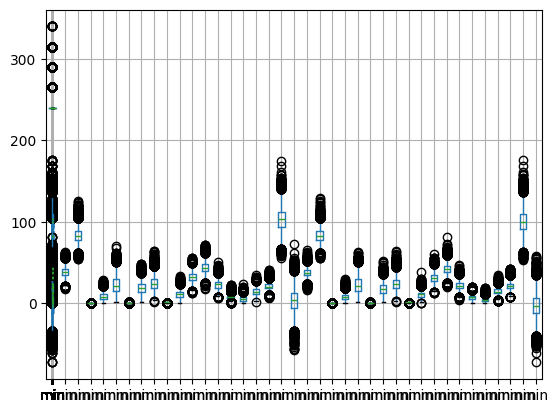

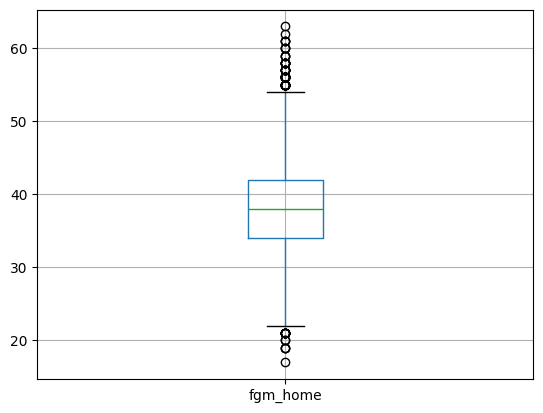

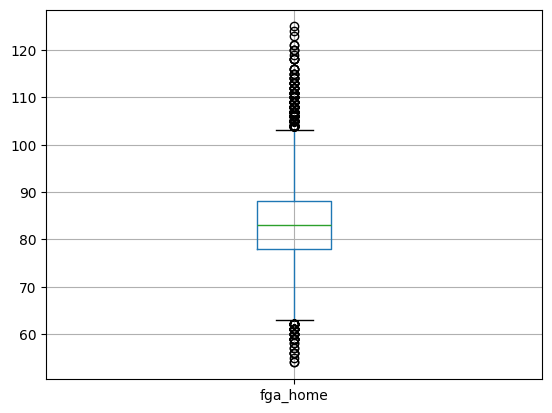

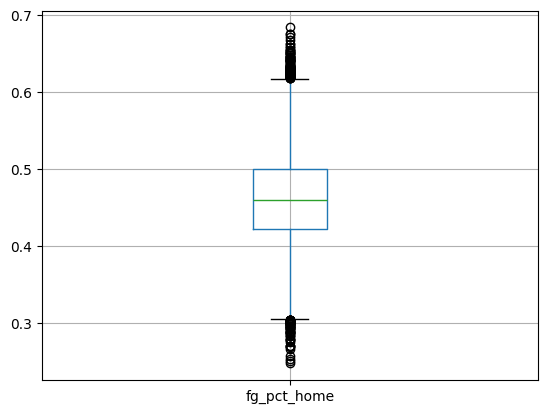

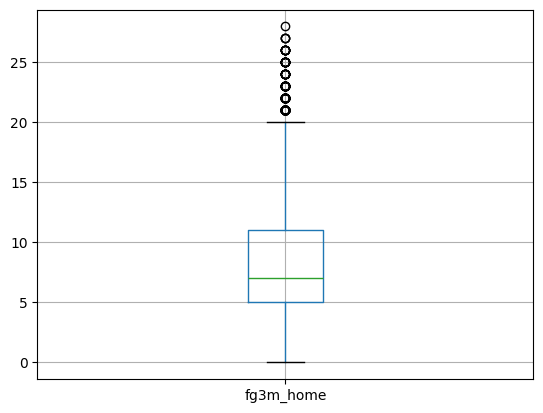

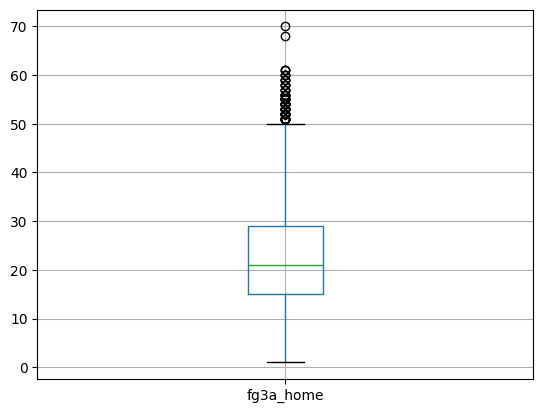

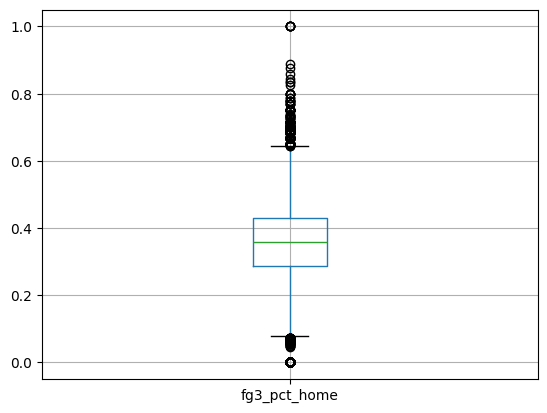

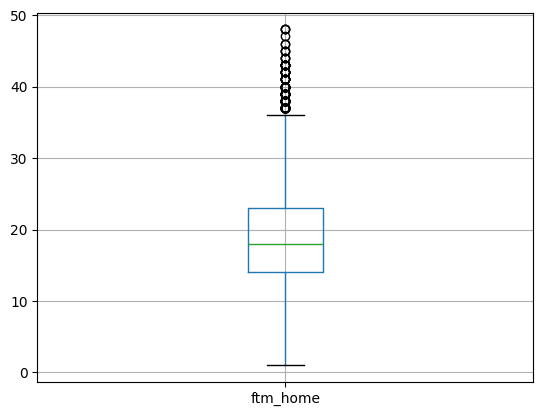

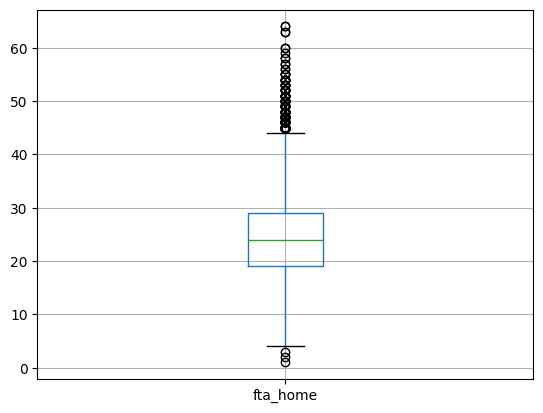

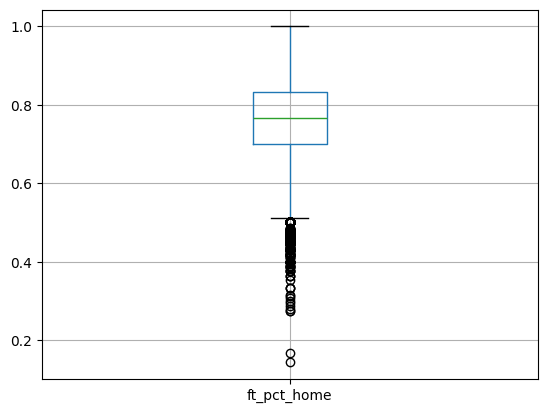

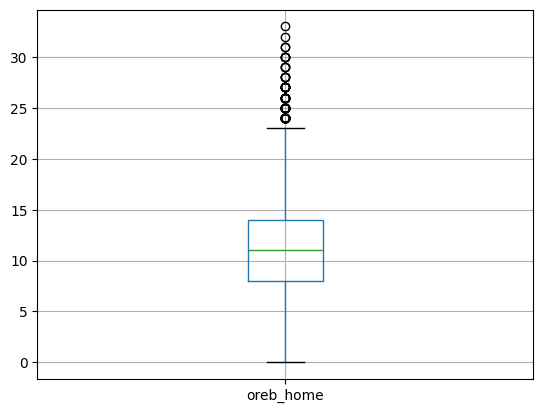

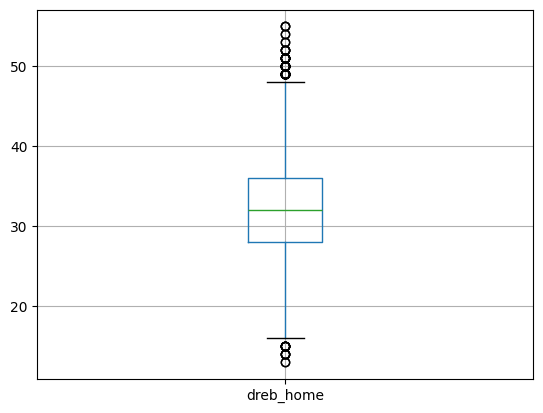

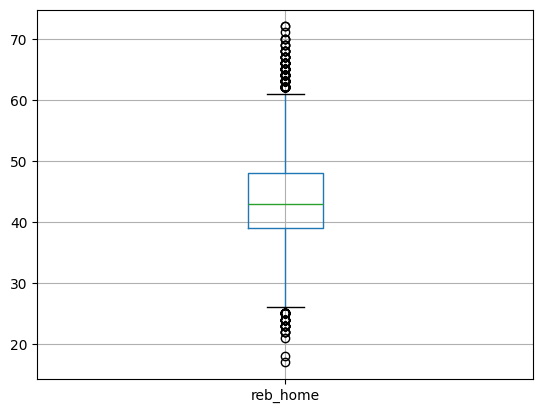

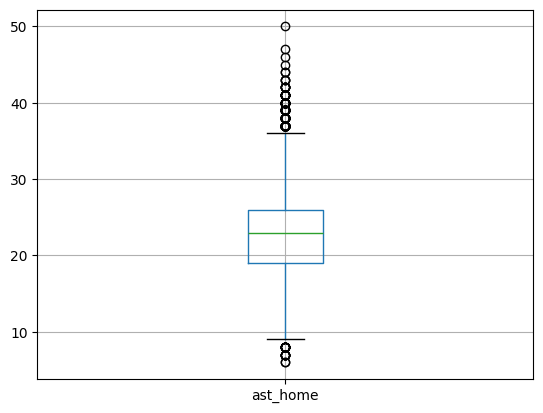

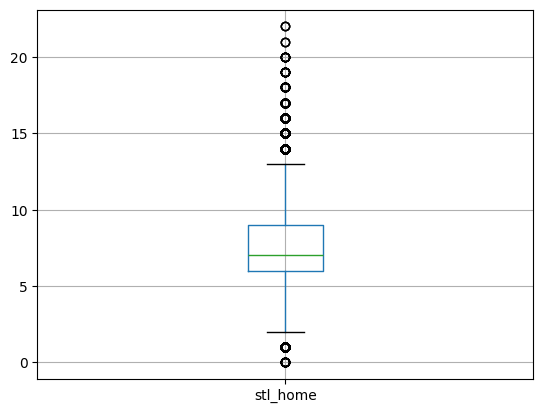

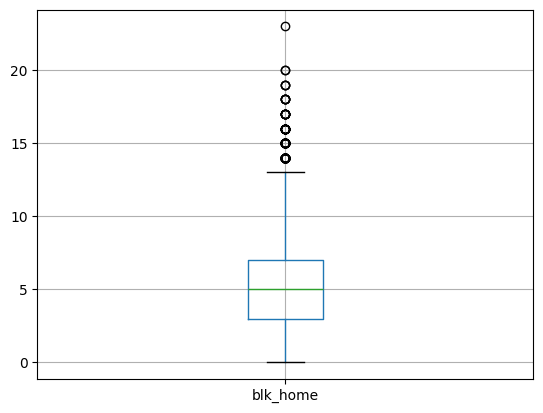

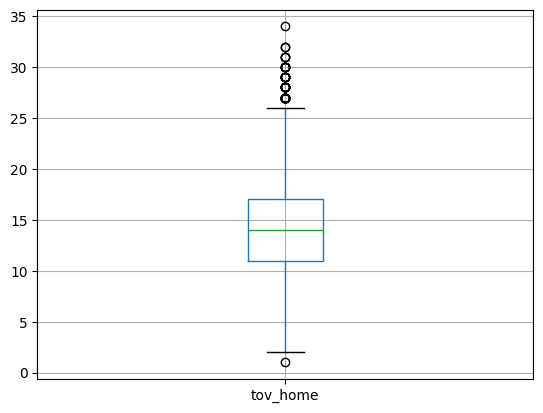

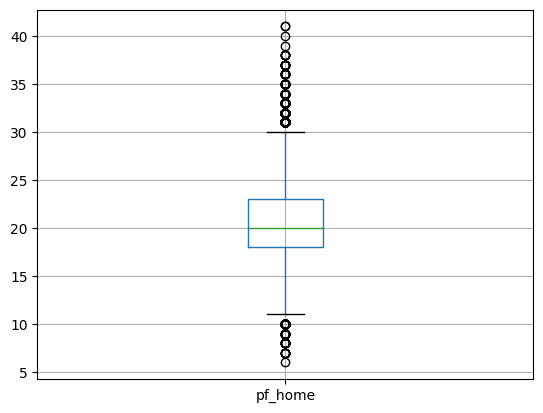

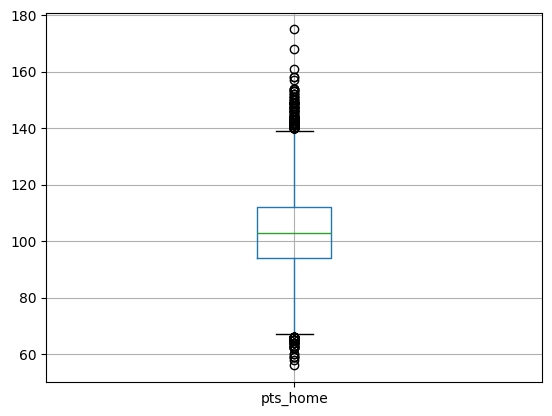

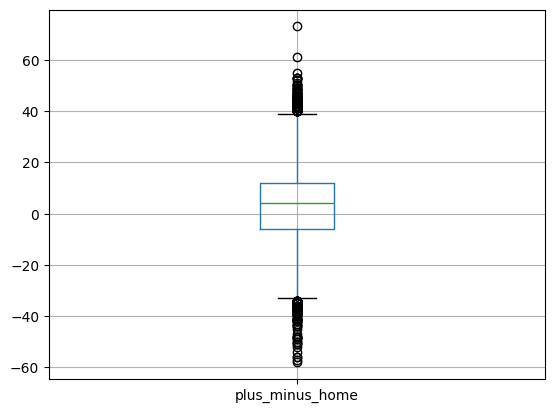

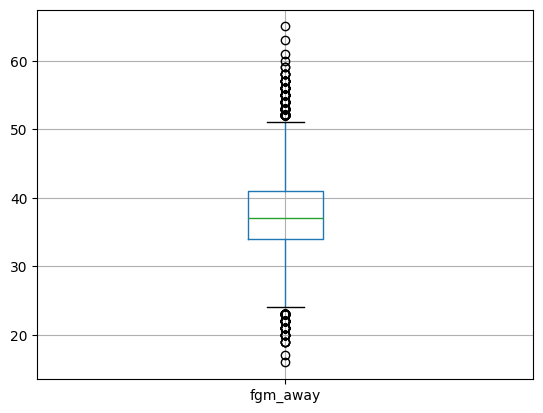

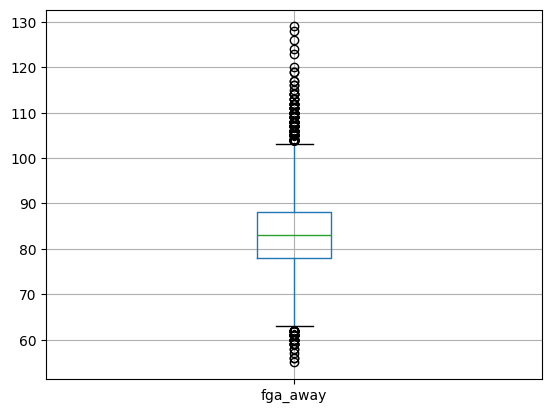

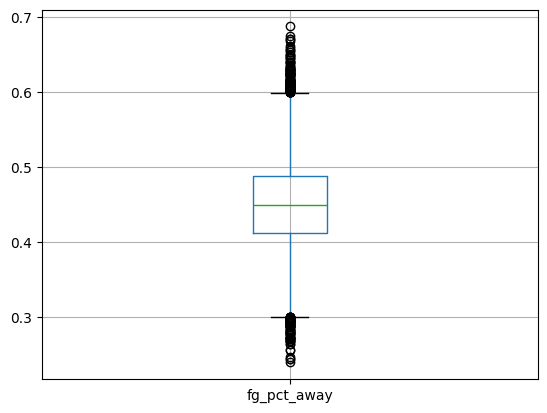

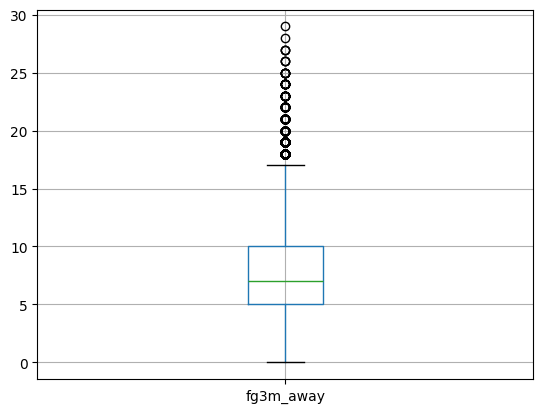

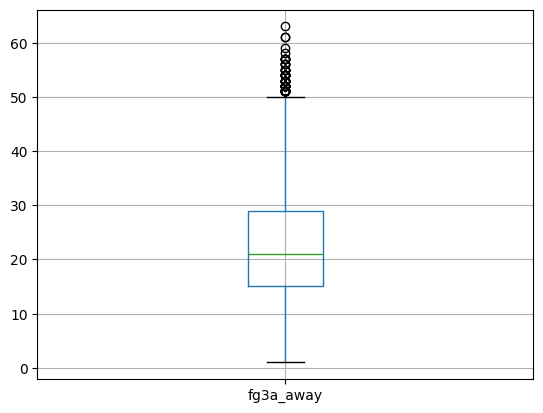

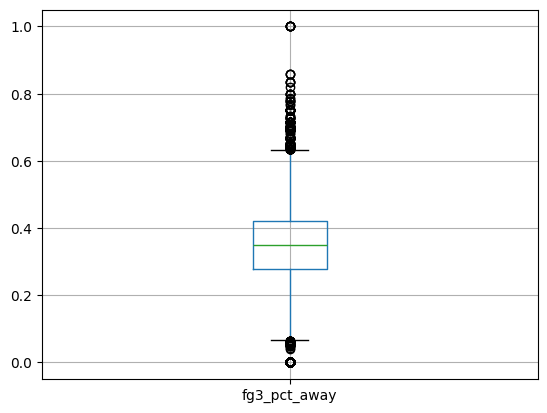

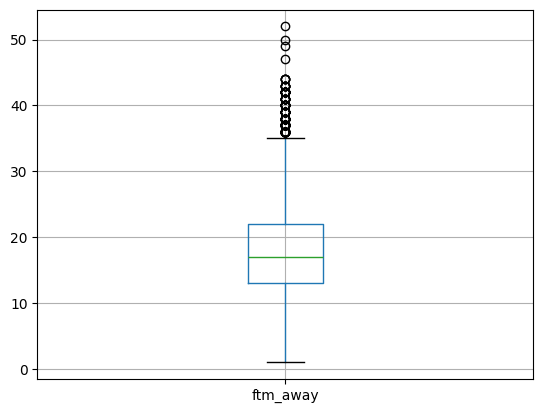

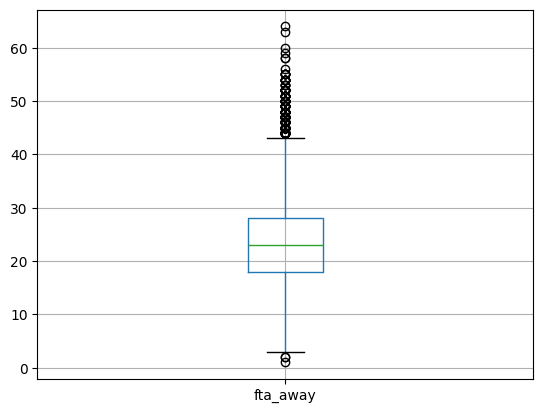

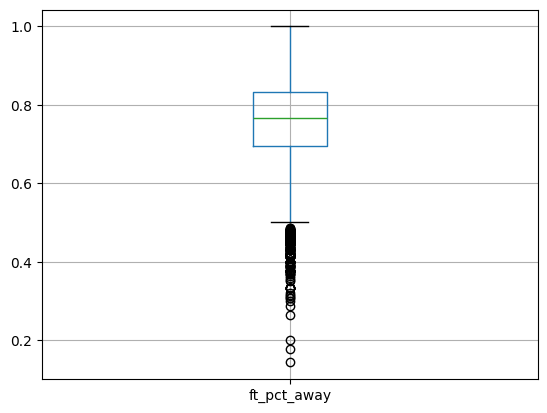

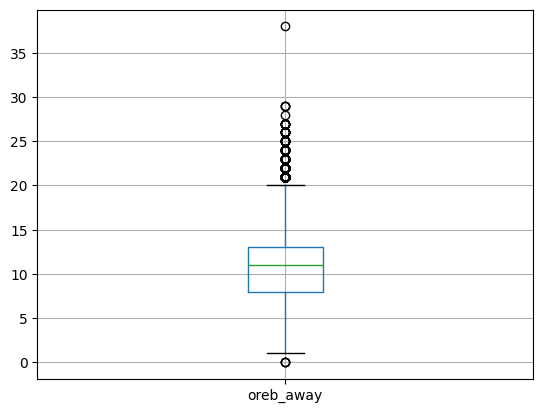

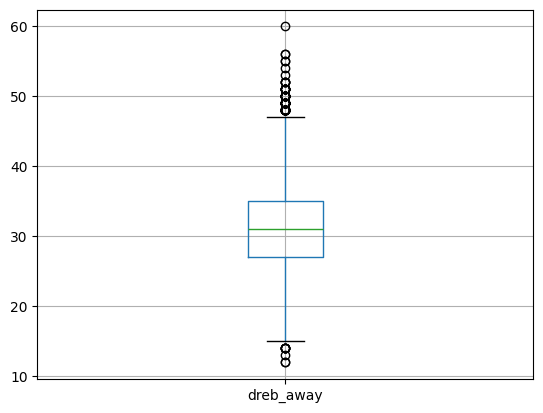

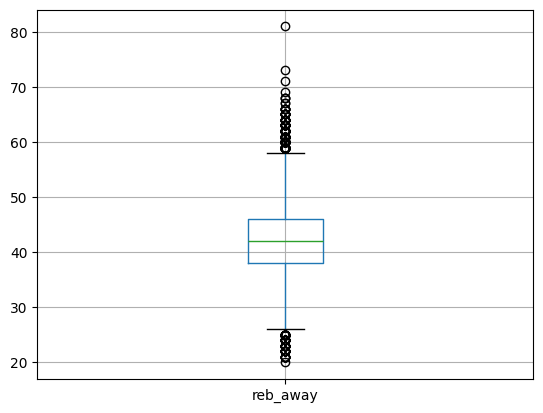

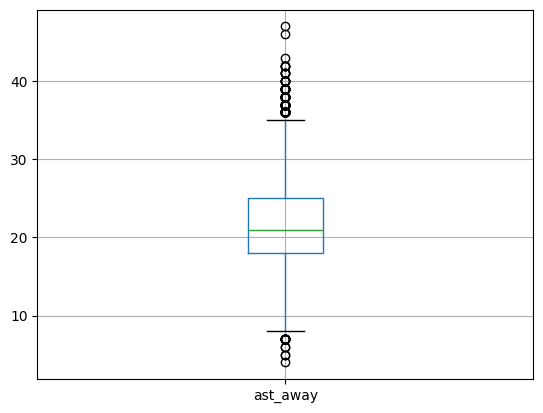

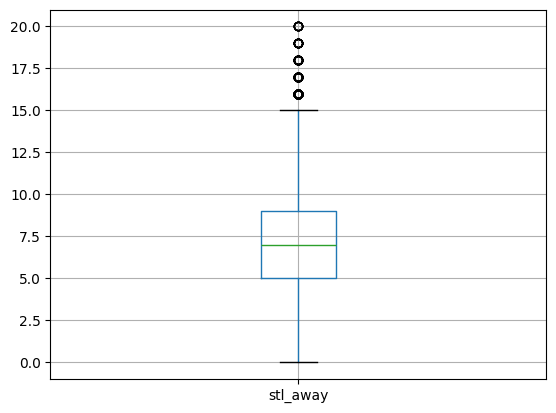

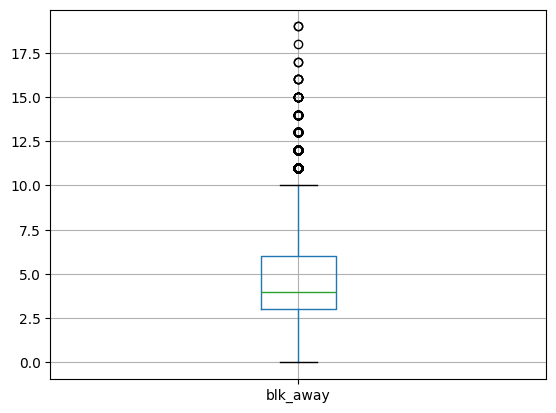

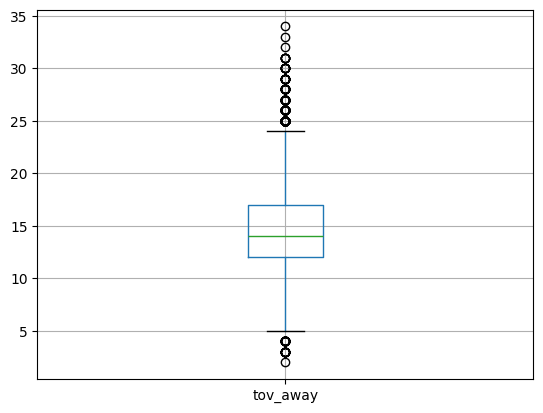

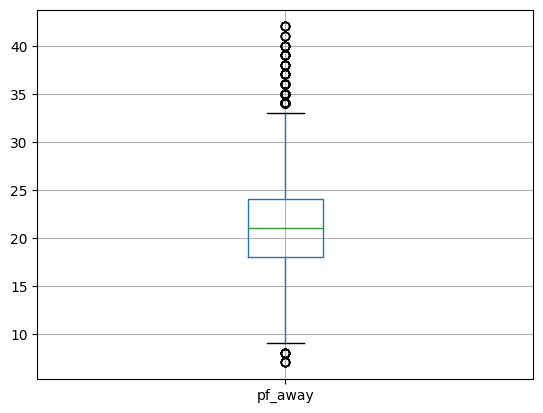

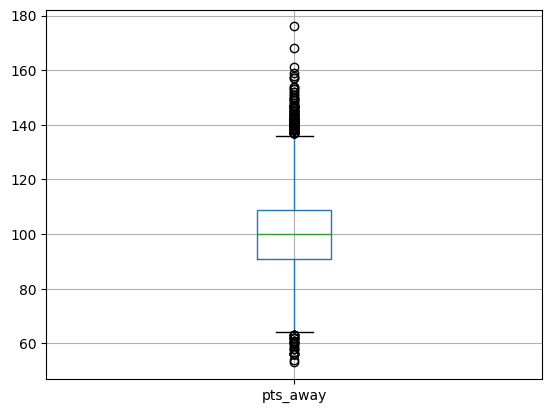

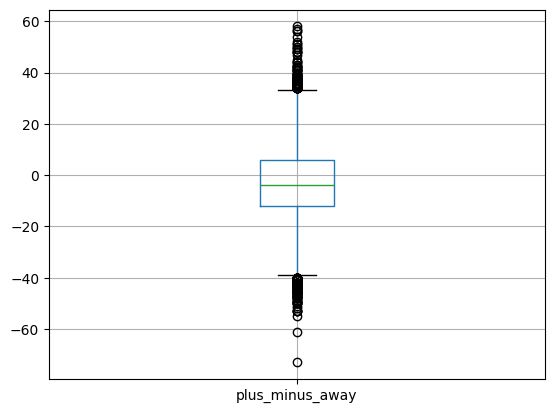

In [80]:
for i in columnas_df:
    boxplot = df_XX.boxplot(column=i)
    boxplot.plot()

    plt.show()


Despues de revisar los boxplot. Aunque es cierto que hay bastantes outliers, dependiendo de la columna estudiada, no hay valores no reales, ni valores que vayan a desvirtuar el análisis. 

AttributeError: 'Axes' object has no attribute 'show'